In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline

df = pd.read_csv("housing_prices.csv", header=0)
df2=df.values

X = df2[:, 1:11] #get feature data (10columns)
y = df2[:, 12] #get target data (classification 0 or 1)


X_train=X[0:900, :] #About 60 percent training (900/1460)
y_train=y[0:900]
X_test=X[900:, :] #About 40 percent testing (560/1460)
y_test=y[900:]

#Code below edited from Homework 5
def svm_calc(c, kernel): #find parameters and accuracy for SVM
    if kernel=='linear':
        svc = svm.SVC(probability=False, kernel='linear', C=c) #run linear kernel
    if kernel=='rbf':
        svc = svm.SVC(probability=False, kernel='rbf', C=c) #run rbf kernel
    if kernel=='poly':
        svc = svm.SVC(probability=False, kernel='poly', C=c) #run poly kernel
    
    svc=svc.fit(X_train, y_train) #fit training data to svm
    
    Yhat_svc_train = svc.predict(X_train) #predict y values from training data
    acc_train = np.sum(np.where((Yhat_svc_train == y_train), 1, 0))/X_train.shape[0] #calc training accuracy
    
    train_acc_svm.append(acc_train) #append training accuracy to list for graphing
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_test = svc.predict(X_test) #predict y values from test data
    acc_test = np.sum(np.where((Yhat_svc_test == y_test), 1, 0))/X_test.shape[0] #calc test accuracy
    
    test_acc_svm.append(acc_test) #append training accuracy to list for graphing
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    c_svm.append(c)
    


Train Accuracy = 0.833333
Test Accuracy = 0.858929
Train Accuracy = 0.833333
Test Accuracy = 0.858929
Train Accuracy = 0.834444
Test Accuracy = 0.857143
Train Accuracy = 0.835556
Test Accuracy = 0.857143
Train Accuracy = 0.837778
Test Accuracy = 0.858929
Train Accuracy = 0.863333
Test Accuracy = 0.873214
Train Accuracy = 0.920000
Test Accuracy = 0.919643
Train Accuracy = 0.930000
Test Accuracy = 0.923214


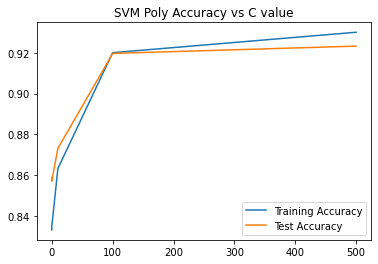

In [51]:
train_acc_svm = [] #initialize lists
test_acc_svm = []
c_svm = []

cVals=[.0001, .001, .01, .1, 1, 10, 100, 500] #different C values to test

for c in cVals:
    svm_calc(c, 'poly') #change second term to run linear, rbf, or poly kernel

plt.plot(c_svm, train_acc_svm) #plot training accuracy
plt.plot(c_svm, test_acc_svm) #plot testing accuracy

plt.title('SVM Poly Accuracy vs C value')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right') #add legend